In [1]:
import pandas as pd
import yfinance as yf

# Mute sklearn warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

---
# Full Process

In [2]:
# Process 1

def yfinance_data(ticker_symbol, start_date):
    
    # Import the necessary libraries
    import yfinance as yf
    import pandas as pd
    
    # Load data from Yahoo Finance
    ticker = yf.Ticker(ticker_symbol)
    ticker_df = ticker.history(start=start_date)
    
    # Remove the time from the index
    ticker_df.index = pd.to_datetime(ticker_df.index)
    ticker_df.index = ticker_df.index.date
    
    return ticker_df

df = yfinance_data('AAPL', '2019-1-1')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2019-01-02,37.374024,38.329550,37.214769,38.105145,148158800,0.0,0.0
2019-01-03,34.741496,35.161349,34.263735,34.309582,365248800,0.0,0.0
2019-01-04,34.874217,35.844220,34.698073,35.774242,234428400,0.0,0.0
2019-01-07,35.880404,35.911774,35.204780,35.694607,219111200,0.0,0.0
2019-01-08,36.087917,36.633243,35.836973,36.375057,164101200,0.0,0.0


In [3]:
# Process 3

def simple_ma(dataframe, sma_vals):
    for i in sma_vals:
        dataframe[f'SMA_{i}'] = dataframe['Close'].rolling(i).mean().shift()
    return dataframe

df = simple_ma(df, [5,10,15,30])

In [4]:
# Process 4

def exponential_ma(dataframe, ema_vals):
    for i in ema_vals:
        dataframe[f'EMA_{i}'] = dataframe['Close'].ewm(i).mean().shift()
    return dataframe

df = exponential_ma(df, [9])
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5,SMA_10,SMA_15,SMA_30,EMA_9
2019-01-02,37.374024,38.329550,37.214769,38.105145,148158800,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2019-01-03,34.741496,35.161349,34.263735,34.309582,365248800,0.0,0.0,NaN,NaN,NaN,NaN,38.105145
2019-01-04,34.874217,35.844220,34.698073,35.774242,234428400,0.0,0.0,NaN,NaN,NaN,NaN,36.107480
2019-01-07,35.880404,35.911774,35.204780,35.694607,219111200,0.0,0.0,NaN,NaN,NaN,NaN,35.984514
2019-01-08,36.087917,36.633243,35.836973,36.375057,164101200,0.0,0.0,NaN,NaN,NaN,NaN,35.900214


In [5]:
# Process 5

# Create RSI Indicator
def relative_strength_idx(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    
    df['RSI'] = rsi.fillna(0)
    
    return df

df =  relative_strength_idx(df).fillna(0)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5,SMA_10,SMA_15,SMA_30,EMA_9,RSI
2019-01-02,37.374024,38.329550,37.214769,38.105145,148158800,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2019-01-03,34.741496,35.161349,34.263735,34.309582,365248800,0.0,0.0,0.0,0.0,0.0,0.0,38.105145,0.0
2019-01-04,34.874217,35.844220,34.698073,35.774242,234428400,0.0,0.0,0.0,0.0,0.0,0.0,36.107480,0.0
2019-01-07,35.880404,35.911774,35.204780,35.694607,219111200,0.0,0.0,0.0,0.0,0.0,0.0,35.984514,0.0
2019-01-08,36.087917,36.633243,35.836973,36.375057,164101200,0.0,0.0,0.0,0.0,0.0,0.0,35.900214,0.0


In [6]:
# Process 6

# Create MACD Indicator
def macd(dataframe, ema_low, ema_high, macd_value):
    EMA_low = pd.Series(dataframe['Close'].ewm(span=ema_low, min_periods=ema_low).mean())
    EMA_high = pd.Series(dataframe['Close'].ewm(span=ema_high, min_periods=ema_high).mean())
    dataframe['MACD'] = pd.Series(EMA_low - EMA_high)
    dataframe['MACD_signal'] = pd.Series(dataframe.MACD.ewm(span=macd_value, min_periods=macd_value).mean())
    return dataframe

df = macd(df, 12, 26, 9)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5,SMA_10,SMA_15,SMA_30,EMA_9,RSI,MACD,MACD_signal
2019-01-02,37.374024,38.329550,37.214769,38.105145,148158800,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,NaN,NaN
2019-01-03,34.741496,35.161349,34.263735,34.309582,365248800,0.0,0.0,0.0,0.0,0.0,0.0,38.105145,0.0,NaN,NaN
2019-01-04,34.874217,35.844220,34.698073,35.774242,234428400,0.0,0.0,0.0,0.0,0.0,0.0,36.107480,0.0,NaN,NaN
2019-01-07,35.880404,35.911774,35.204780,35.694607,219111200,0.0,0.0,0.0,0.0,0.0,0.0,35.984514,0.0,NaN,NaN
2019-01-08,36.087917,36.633243,35.836973,36.375057,164101200,0.0,0.0,0.0,0.0,0.0,0.0,35.900214,0.0,NaN,NaN


In [7]:
# Process 7

# Shift Labels
def move_up_data(dataframe, move_value):
    dataframe['Close'] = dataframe['Close'].shift(move_value)
    return dataframe

df = move_up_data(df, -1)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5,SMA_10,SMA_15,SMA_30,EMA_9,RSI,MACD,MACD_signal
2019-01-02,37.374024,38.329550,37.214769,34.309582,148158800,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,NaN,NaN
2019-01-03,34.741496,35.161349,34.263735,35.774242,365248800,0.0,0.0,0.0,0.0,0.0,0.0,38.105145,0.0,NaN,NaN
2019-01-04,34.874217,35.844220,34.698073,35.694607,234428400,0.0,0.0,0.0,0.0,0.0,0.0,36.107480,0.0,NaN,NaN
2019-01-07,35.880404,35.911774,35.204780,36.375057,219111200,0.0,0.0,0.0,0.0,0.0,0.0,35.984514,0.0,NaN,NaN
2019-01-08,36.087917,36.633243,35.836973,36.992775,164101200,0.0,0.0,0.0,0.0,0.0,0.0,35.900214,0.0,NaN,NaN


In [8]:
# Process 8, Last

# Remove Rows
def remove_rows(dataframe, first_n_row):
    dataframe = dataframe.iloc[first_n_row:]
    dataframe = dataframe[:-1] # Remove last row
    
    return dataframe

df = remove_rows(df, 33)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5,SMA_10,SMA_15,SMA_30,EMA_9,RSI,MACD,MACD_signal
2019-02-20,41.484265,42.000427,41.435800,41.452766,104457600,0.0,0.0,41.351955,41.443121,40.886080,38.964360,40.416987,70.567973,0.851215,0.906073
2019-02-21,41.632091,41.770217,41.268598,41.915611,68998800,0.0,0.0,41.407205,41.409045,41.177045,39.164134,40.547706,64.822171,0.814684,0.885597
2019-02-22,41.578774,41.922881,41.530309,42.220951,75652800,0.0,0.0,41.449855,41.350016,41.282308,39.333391,40.640536,68.071924,0.811534,0.869392
2019-02-25,42.203990,42.618370,42.153099,42.245186,87493600,0.0,0.0,41.555026,41.416898,41.399284,39.497486,40.770982,61.340637,0.822796,0.859385
2019-02-26,42.094943,42.480245,41.964084,42.376038,68280800,0.0,0.0,41.739682,41.509469,41.535329,39.667817,40.918980,53.299546,0.823990,0.851894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19,135.110001,135.199997,131.320007,132.300003,79592600,0.0,0.0,140.836002,141.947002,143.267334,144.791332,143.240906,36.714963,-2.641639,-1.324090
2022-12-20,131.389999,133.250000,129.889999,135.449997,77432800,0.0,0.0,138.412000,140.521001,142.477334,144.590999,142.153815,20.129106,-3.098975,-1.679067
2022-12-21,132.979996,136.809998,132.750000,132.229996,85928000,0.0,0.0,135.778000,139.460001,141.886001,144.370332,141.168433,27.979426,-3.170690,-1.977391
2022-12-22,134.350006,134.559998,130.300003,131.860001,77852100,0.0,0.0,134.225998,138.911000,141.047334,144.235332,140.596590,25.595210,-3.447609,-2.271435


In [10]:
# Process 9

def delete_columns(dataframe, cols_list):
    new_dataframe = dataframe.drop(columns = cols_list, axis=1)
    return new_dataframe

df = delete_columns(df, ['Dividends', 'Stock Splits', 'Volume', 
                         'Open', 'Low', 'High'])
df.head()

,Close,SMA_5,SMA_10,SMA_15,SMA_30,EMA_9,RSI,MACD,MACD_signal
2019-02-20,41.452766,41.351955,41.443121,40.886080,38.964360,40.416987,70.567973,0.851215,0.906073
2019-02-21,41.915611,41.407205,41.409045,41.177045,39.164134,40.547706,64.822171,0.814684,0.885597
2019-02-22,42.220951,41.449855,41.350016,41.282308,39.333391,40.640536,68.071924,0.811534,0.869392
2019-02-25,42.245186,41.555026,41.416898,41.399284,39.497486,40.770982,61.340637,0.822796,0.859385
2019-02-26,42.376038,41.739682,41.509469,41.535329,39.667817,40.918980,53.299546,0.823990,0.851894


In [11]:
# Pandas Pipe

---

## New Set of Functions

In [12]:
# Split data for XGBoost
def xgb_datasplit(dataframe, valid_size, test_size):

    test_split_idx  = int(dataframe.shape[0] * (1-test_size))
    valid_split_idx = int(dataframe.shape[0] * (1-(valid_size+test_size)))

    train_df  = df.iloc[:valid_split_idx].copy()
    valid_df  = df.iloc[valid_split_idx+1:test_split_idx].copy()
    test_df   = df.iloc[test_split_idx+1:].copy()
        
    return train_df, valid_df, test_df

df_train, df_valid, df_test = xgb_datasplit(df, 0.15, 0.15)

In [13]:
def xy_split(dataframe, y_column):
    features = dataframe.loc[:, dataframe.columns != y_column]
    target = dataframe[y_column]
    
    # X_train, y_train
    return features, target

X_train, y_train = xy_split(df_train, 'Close')
X_valid, y_valid = xy_split(df_valid, 'Close')
X_test, y_test = xy_split(df_test, 'Close')

In [14]:
import xgboost as xgb

In [15]:
%%time

paraams = {'gamma': 0.001, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 500, 'random_state': 42}

model = xgb.XGBRegressor(**paraams, objective='reg:squarederror', verbosity = 0, booster='gblinear')
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], verbose=0)

Wall time: 216 ms


XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.001, gpu_id=-1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=0, num_parallel_tree=None, predictor=None,
             random_state=42, ...)

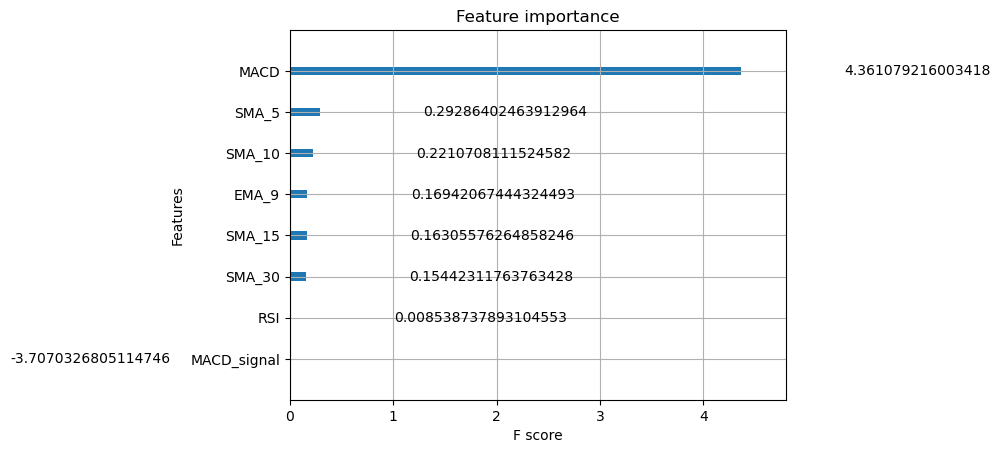

In [16]:
from xgboost import plot_importance

plot_importance(model);

In [17]:
import numpy as np

y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

y_true = [148.25778198 150.75018311 144.93791199 145.69560242 148.25778198]
y_pred = [146.81036 148.45056 150.36876 150.36595 150.1848 ]


In [18]:
from sklearn.metrics import mean_squared_error

print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

mean_squared_error = 19.500603278986468


----

## NEW MODEL

In [19]:
%%time

import xgboost as xgb
from sklearn.model_selection import GridSearchCV


parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, 
                         objective='reg:squarederror', booster='gblinear',
                         verbosity = 0)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best params: {'gamma': 0.005, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 400, 'random_state': 42}
Best validation score = 0.7207338160792347
Wall time: 53 s


In [20]:
%%time

model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror', verbosity = 0)
model.fit(X_train, y_train, eval_set=eval_set, verbose=0)

Wall time: 592 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.005, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

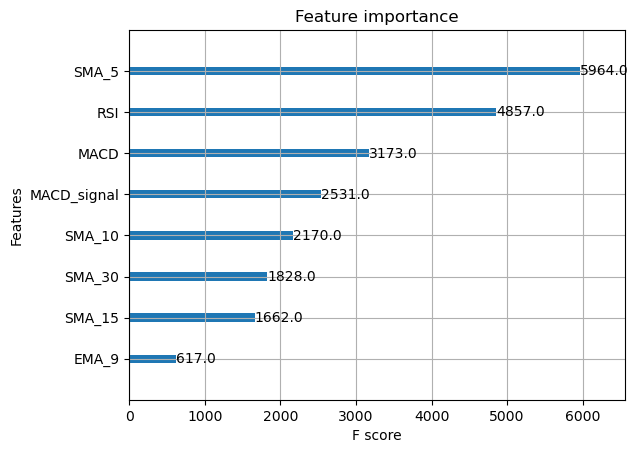

In [21]:
from xgboost import plot_importance

plot_importance(model);

In [22]:
import numpy as np

y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

y_true = [148.25778198 150.75018311 144.93791199 145.69560242 148.25778198]
y_pred = [141.50262 143.70842 143.15068 143.72047 143.35881]


In [23]:
from sklearn.metrics import mean_squared_error

print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

mean_squared_error = 112.67316936081244


---

In [24]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


predicted_prices = df_2019.loc[test_split_idx+1:].copy()
predicted_prices['Close'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=predicted_prices.Close,
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()

NameError: name 'df_2019' is not defined

In [ ]:
%%time

import xgboost as xgb
from sklearn.model_selection import GridSearchCV


parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.10, 0.15, 0.2],
    'max_depth': [10, 12, 15, 18, 20],
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1],
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbosity = 0, booster='gblinear')
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

In [ ]:
%%time

model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror', 
                         verbosity = 0, 
                         booster='gblinear')
model.fit(X_train, y_train, eval_set=eval_set, verbose=0)

In [ ]:
import numpy as np

y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


predicted_prices = df_2019.loc[test_split_idx+1:].copy()
predicted_prices['Close'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=predicted_prices.Close,
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()

In [ ]:
from sklearn.metrics import mean_squared_error

print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

In [ ]:
SHET AHAHAH IM SO PROUD